# Tutorial Exercises II

We saw in the lecture that when $n$ is large, the binomial distribution can be approximated by the normal distribution

In this section we will fit such an approximation.

In the Olden Days (as recently as 2021 on this course) you might have used a normal approximation to get the proability of obtaining at least $k$ hits when $n$ is large, which would be cumbersome to do by hand using the binomial equation

In Modern Times (now we are working on computers) you won't need to do that, but it is important to understand conceptually the relationship between these distributions as this is fundamental to the Central Limit Theorem, which in turn explains why Most Noise in the world is Normal (more on these topics next week).



## Normal approximation to the binomial

Say we want to fit a normal approximation to the binomial distribution:

$$ x \sim \mathcal{B}(30,0.5) $$

... which is the distribution of the number of hits (out of $n=30$ trials) expected due to chance ($p=0.5$) in the Blindsight example

To fit a normal approximation to a binomial, we need to decide on the values of the parameters of the normal distriubtion, $\mu$ and the standard deviation $\sigma$

The best fitting normal distribution is going to be the one with the same mean and standard deviation as the binomial to be fit.


### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
sns.set_theme() # use pretty defaults

### Mean and standard deviation of the binomial

We saw in the lecture (and in the workbook 'Changing n and p') that the mean of the binomial, or Expected Value of $k$ hits, is given by

$$ E(k) = np $$

and the standard deviation is 

$$ s(k) = \sqrt{npq} $$

In [2]:
n=30
p=0.5

m = n*p
s = (n*p*(1-p))**0.5 # power of 0.5 is same as square root

Now we can create a normal distribution matching these parameters:

In [3]:
x = range(n+1) # possible values of number of hits
normalApprox = stats.norm.pdf(x,m,s)

... and calculate the actual probaility of each value of $k$ hits, using the binomial PMF:

In [4]:
binoProbs = stats.binom.pmf(x,n,p)

let's compare them in a figure:

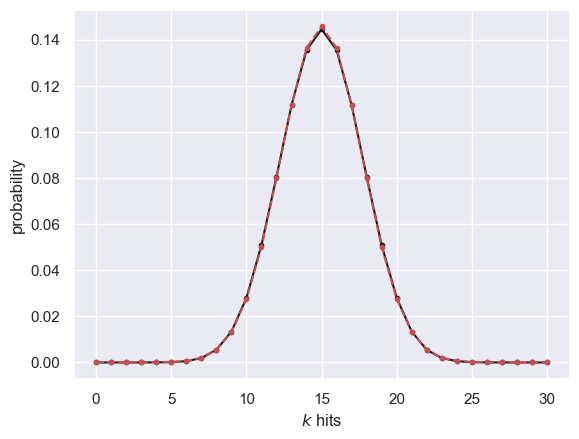

In [5]:
plt.plot(x,binoProbs,'k.-')
plt.plot(x,normalApprox,'r.--')

plt.xlabel('$k$ hits')
plt.ylabel('probability')
plt.show()

### When is it a good fit?

A rule of thumb is that the normal approximation can be used when $np$ and $nq$ are both greater than 5.

This means the normal approximation breaks down when:
<ul>
<li> n is small
<li> p is close to 0 or 1
<ul>

Below I have copied the code for comparing the binomial and its normal approximation into a single code block. 

Try a few values for n and p to see how the approximation breaks down in the two cases above

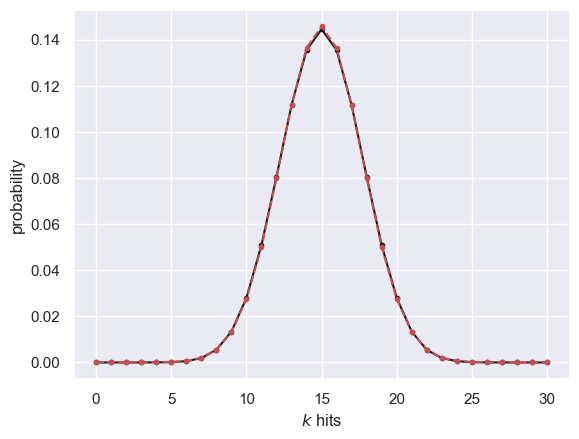

In [6]:
n=30
p=0.5

m = n*p
s = (n*p*(1-p))**0.5 # power of 0.5 is same as square root

x = range(n+1) # possible values of number of hits
normalApprox = stats.norm.pdf(x,m,s)
binoProbs = stats.binom.pmf(x,n,p)

plt.plot(x,binoProbs,'k.-')
plt.plot(x,normalApprox,'r.--')

plt.xlabel('$k$ hits')
plt.ylabel('probability')
plt.show()

### Continuity correction

A caveat here is that the normal distriubtion is continuous (defined for all values of x, eg x = 7, x=7.01, x=70.312929) whilst the ibnomial distribution is discrete (defined for only integer values of k, k=1,2,3 etc).

Say we want to know the probability that our blindsight patient DB obtained at least 22/30 hits due to chance

Using the binomial distribution:

In [7]:
n=30
p=0.5

# p(k>=22) = 1-p(k<=21) = 1-CDF(21)
1-stats.binom.cdf(21,n,p)

0.008062400855123997

Find the probability x>=22 using the normal approximation

In [8]:
m = n*p
s = (n*p*(1-p))**0.5

1-stats.norm.cdf(22,m,s)

0.005293568667028459

Hm, it's not the same.

The reason is that the binomial is defined only for discrete values. 

So the probability that $k=22$ (under the discrete binomial) is equivalent to the probability that $k$ takes any value that would <i>round</i> to 22 (under the continuous normal), ie $p(21.5 <= k < 22.5)$

<img src= "https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/images/continuity.png" width="100%"  />

Similarly the probaility  $k>=22$ (under the discrete binomial) is equivalent to the probability that $k$ takes any value that would <i>round</i> to 22 or more (under the continuous normal), ie $p(k>21.5)$

Let's check if this gives us a match to the binomial probability:

In [9]:
1-stats.norm.cdf(21.5,m,s)

0.008811045481162183

Much closer!

nb. it's not an exact match because the normal approximation is... well... an approximation